In [1]:
import torch

### First Step Mapping Hyper Params to Unconstrained floats in R

we want to map from parameters which are constrained to parameters with which can be any number from -inf to +inf, an example could be dropout, which is constrained from 0.0 to 1.0. we can map it with s_logit as described below

In [2]:
def logit(x):
    return torch.log(x) - torch.log(1-x)

In [3]:
def s_logit(x, min=0, max=1):
    """Stretched logit function: Maps x lying in (min, max) to R"""
    return logit((x - min)/(max-min))

In [4]:
from matplotlib import pyplot as plt

in the plot we can see that values from 0 to 1 (which could be dropout values) are mapped to any value from 0.0 to 1.0

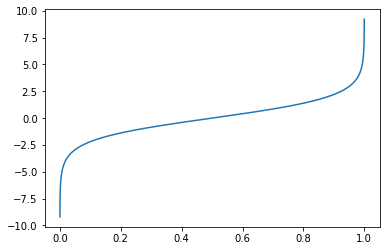

In [5]:
plt.plot(torch.arange(0,1,0.0001).numpy(),s_logit(torch.arange(0,1,0.0001)).numpy())

In [6]:
def get_unconstrained_R(hyper_paramater, min=0.,max=1):
    if min is not None and max is not None:
        return s_logit(torch.tensor(hyper_paramater), min=min, max=max)
    else:
        return logit(torch.tensor(hyper_paramater))

## Hypter parameter scale 

### might be the $\epsilon$ which we add to hyper parameters ???

In [7]:
def inv_softplus(x):
    """ Inverse softplus function: Maps x lying in (0, infty) to R"""
    return torch.log(torch.exp(x) - 1)

In [8]:
def get_scale(deviation):
    return inv_softplus(torch.tensor(deviation))

In [9]:
def map_hyper_params(param,scale,_min=0.,_max=1.):
    return get_unconstrained_R(param,_min,_max),get_scale(scale)
    

In [12]:
map_hyper_params(0.8,0.1,0.,0.9)

(tensor(2.0794), tensor(-2.2522))

/home/yonatan/.pyenv/versions/3.7.3/envs/stn/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


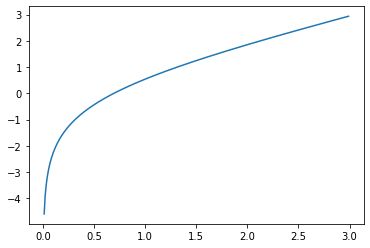

In [64]:
plt.plot(torch.arange(0,3,0.01).numpy(),get_scale(torch.arange(0,3,0.01)).numpy())


In [66]:
get_unconstrained_R(1.)

tensor(inf)

In [ ]:
values which are un constrained could be 